In [4]:
from SpectrumAnalysis.io import process_data_zip, show_fits_info
project_data_filename = 'InSb_project.fits'

In [10]:
process_data_zip(metadata_filename = project_data_filename)

Press the index number to choose the file to read into the hdu
Press 's' to skip the addition of HDU
Press 'e' to end the addition of HDU
Press 'n' to go to the next zip file
Press 'p' to go to the previous zip file
HDU 'REF1' already exists. Skipping...
HDU 'SAMPLE1' already exists. Skipping...
------------------------------
Please select the FITS file to add as HDU 'REF2' (press 'h' for help):
Available files:
0: Background_Noise.fits
1: Polarizer_35deg_THz_pulse_Aperture.fits
2: THz_pulse_Aperture.fits
Go to previous zip file.
------------------------------
Please select the FITS file to add as HDU 'REF2' (press 'h' for help):
Available files:
0: Polarizer_35deg_THz_pulse_Aperture.fits
1: testPolarizer_35deg_THz_pulse_Aperture.fits
You selected: preprocessed_data\Polarizer_35deg_THz_pulse_Aperture.fits
HDU 'REF2' added successfully.
------------------------------
Please select the FITS file to add as HDU 'SAMPLE2' (press 'h' for help):
Available files:
0: Polarizer_35deg_THz_pulse_A

In [7]:
from SpectrumAnalysis.io import show_fits_info
project_data_filename = 'InSb_project.fits'
show_fits_info(project_data_filename)

Filename: InSb_project.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  REF1          1 ImageHDU        21   (26, 500, 1)   float64   
  2  SAMPLE1       1 ImageHDU        26   (11, 500, 6)   float64   
  3  REF2          1 ImageHDU        21   (26, 500, 1)   float64   
  4  SAMPLE2       1 ImageHDU        26   (11, 500, 6)   float64   
  5  STAT_SAMPLE1    1 BinTableHDU     28   6R x 1C   [PE(6264)]   
  6  STAT_SAMPLE2    1 BinTableHDU     28   6R x 1C   [PE(6244)]   
  7  STAT_REF1     1 BinTableHDU     23   6R x 1C   [PE(964)]   
------------------------------
HDU id: REF1
Polarizer_125deg_THz_pulse_Aperture
Data Date: 2025_5_6
Data shape: (1, 500, 26)
Magnetic field values: 1
B0: 0.0
------------------------------
HDU id: SAMPLE1
Polarizer_125deg_THz_pulse_InSb_70K
Data Date: 2025_5_6
Data shape: (6, 500, 11)
Magnetic field values: 6
B0: 0.0
B1: 0.2
B2: 0.4
B3: 0.6
B4: 0.8
B5: 1.0
---------------------------

In [ ]:
from SpectrumAnalysis.io import delete_hdu_from_fits
project_data_filename = 'InSb_project.fits'
delete_hdu_from_fits(project_data_filename, hdu_name_to_remove = 'STAT_SAMPLE1')

HDUs STAT_SAMPLE1 found in InSb_project.fits.
Do you want to overwrite current STAT_SAMPLE1 from InSb_project.fits to make new plot? (y/n): 
Removing STAT_SAMPLE1 from InSb_project.fits.
HDUs STAT_SAMPLE1 not found in InSb_project.fits.
Creating STAT_SAMPLE1 in InSb_project.fits.
Times.shape: (1566,)
Adding STAT_SAMPLE1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   11                                                  NAXIS2  =                  500                                                  NAXIS3  =                    6                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_5_6'

C:\Users\colon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\astropy\io\fits\hdu\hdulist.py:1435: UserWarning: Memory map object was closed but appears to still be referenced. Further access will result in undefined behavior (possibly including segmentation faults).
  self._flush_resize()


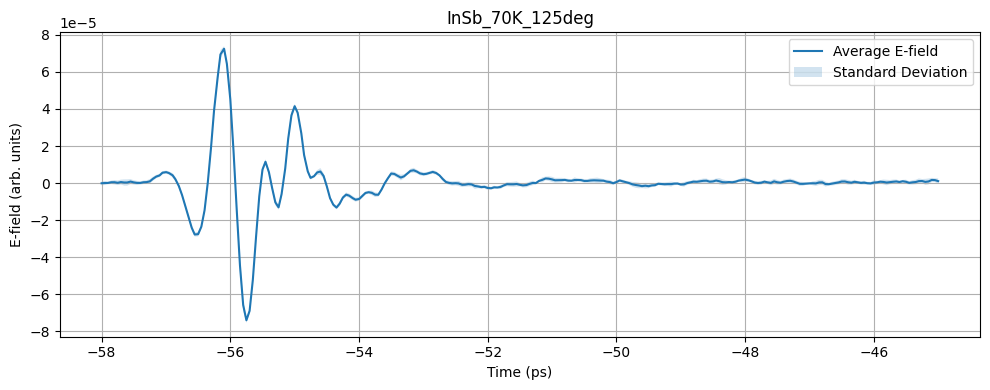

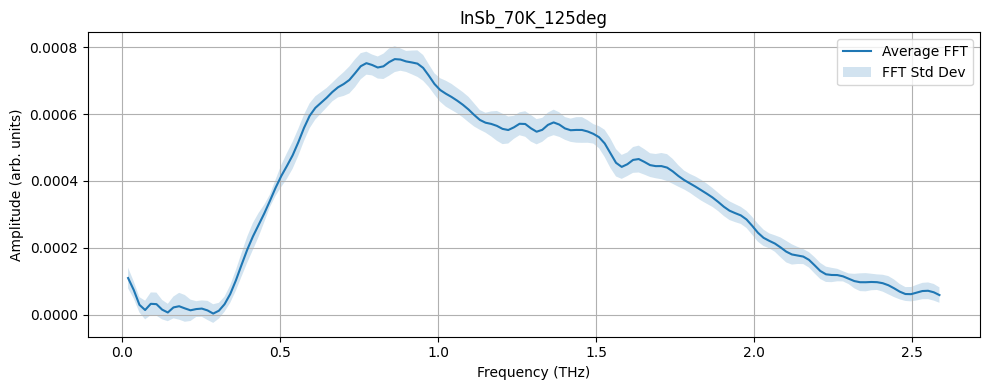

Plots saved to ./.


In [1]:
from SpectrumAnalysis.visualization import plot_avg_std_from_fits
project_data_filename = 'InSb_project.fits'
hdu_id = 'SAMPLE1'
plot_avg_std_from_fits(project_data_filename, hdu_id=hdu_id, time_range=[-58, -45], freq_range = [0, 2.6], zero_padding_ratio=4, title='InSb_70K_125deg')

HDUs STAT_SAMPLE2 found in InSb_project.fits.
Do you want to overwrite current STAT_SAMPLE2 from InSb_project.fits to make new plot? (y/n): 
Removing STAT_SAMPLE2 from InSb_project.fits.
HDUs STAT_SAMPLE2 not found in InSb_project.fits.
Creating STAT_SAMPLE2 in InSb_project.fits.
Times.shape: (1561,)
Adding STAT_SAMPLE2 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   11                                                  NAXIS2  =                  500                                                  NAXIS3  =                    6                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_05_0

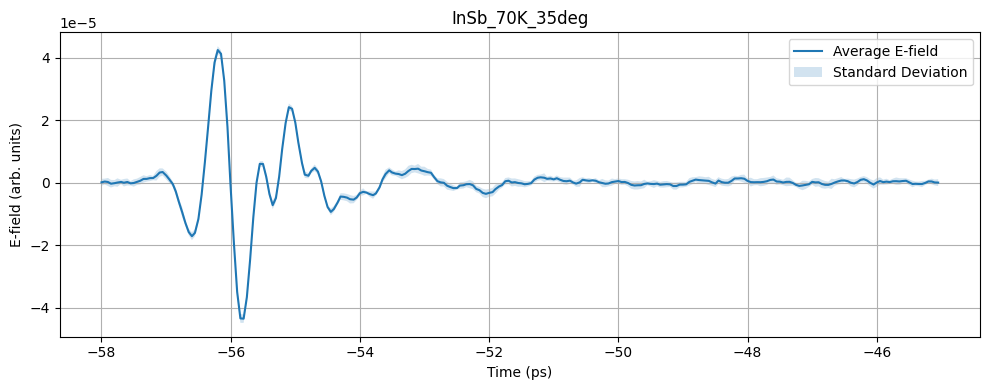

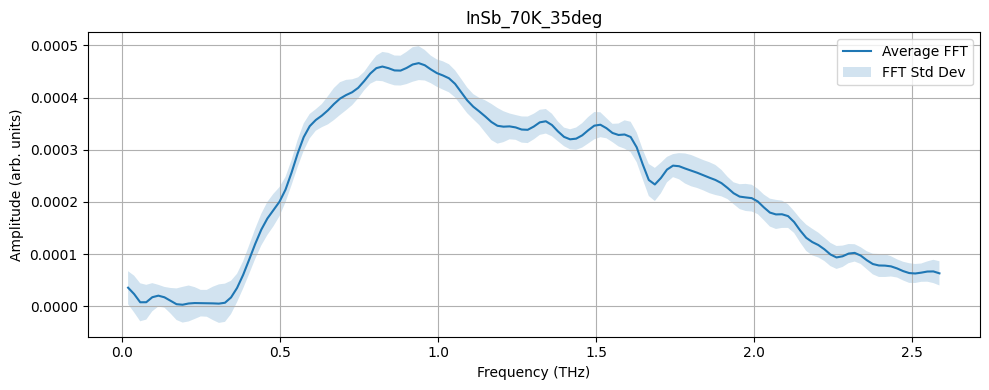

Plots saved to ./.


In [3]:
from SpectrumAnalysis.visualization import plot_avg_std_from_fits
project_data_filename = 'InSb_project.fits'
hdu_id = 'SAMPLE2'
plot_avg_std_from_fits(project_data_filename, hdu_id=hdu_id, time_range=[-58, -45], freq_range=[0, 2.6], zero_padding_ratio=4, title='InSb_70K_35deg')

HDUs STAT_REF1 found in InSb_project.fits.
Do you want to overwrite current STAT_REF1 from InSb_project.fits to make new plot? (y/n): 
Removing STAT_REF1 from InSb_project.fits.
HDUs STAT_REF1 not found in InSb_project.fits.
Creating STAT_REF1 in InSb_project.fits.
Times.shape: (261,)
Adding STAT_REF1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   26                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_5_6'                   

C:\Users\colon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\astropy\io\fits\hdu\hdulist.py:1435: UserWarning: Memory map object was closed but appears to still be referenced. Further access will result in undefined behavior (possibly including segmentation faults).
  self._flush_resize()


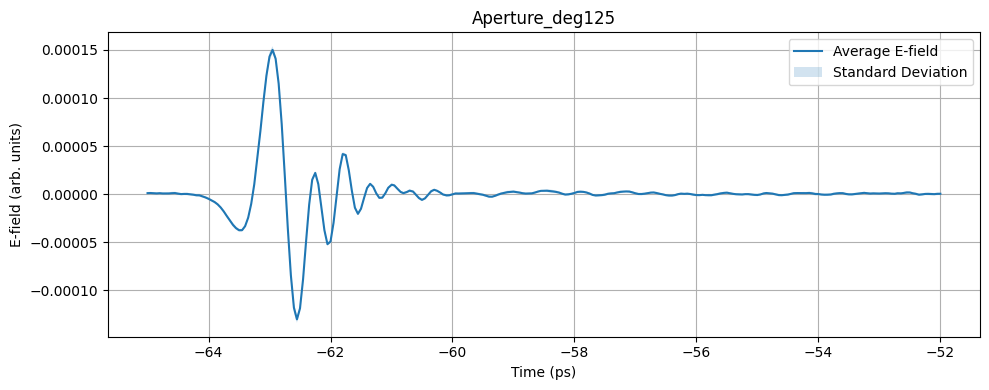

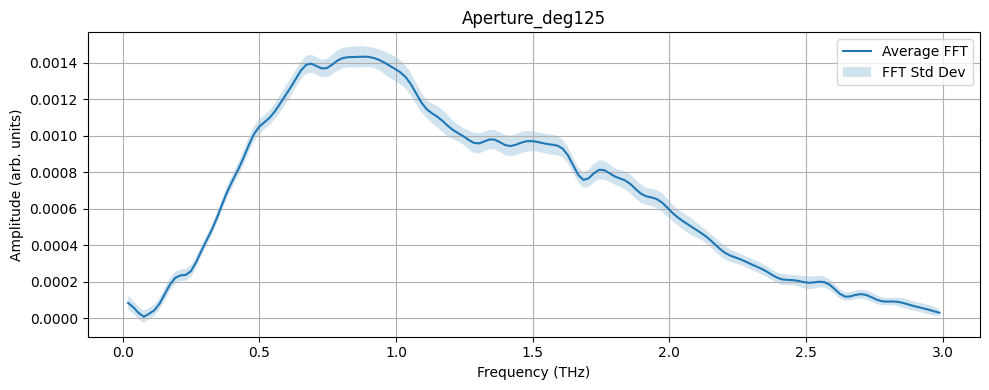

Plots saved to ./.


In [2]:
from SpectrumAnalysis.visualization import plot_avg_std_from_fits
project_data_filename = 'InSb_project.fits'
hdu_id = 'REF1'
plot_avg_std_from_fits(project_data_filename, hdu_id=hdu_id, title='Aperture_deg125', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

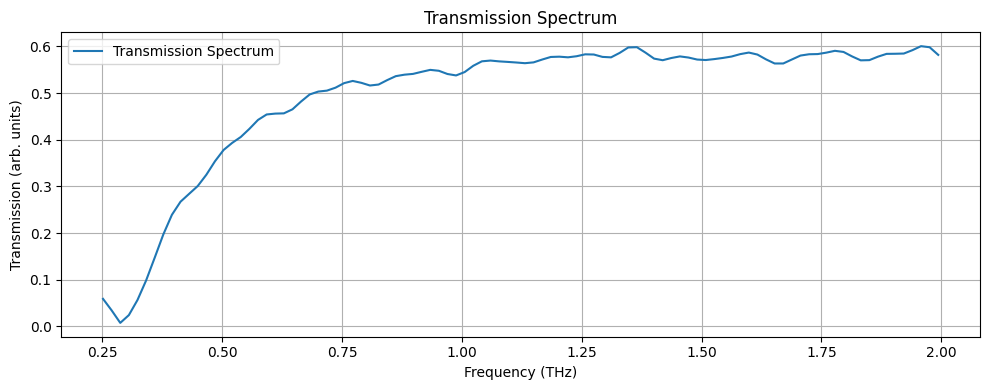

In [ ]:
from SpectrumAnalysis.visualization import plot_transmission_spec
project_data_filename = 'InSb_project.fits'
hdu_id_tr = 'SAMPLE1'
hdu_id_ref = 'REF1'
plot_transmission_spec(project_data_filename, hdu_id_tr, hdu_id_ref, B_field=0.2, freq_range=[0.25, 2.])